# Fresh & Rotten Fruit Detection System


CSE5717 - Team 04

Team members:

Xinhao Wang (XIN-HAO.WANG@UCONN.EDU)

Jeff He (JEFF.HE@UCONN.EDU)

Ruiqi Wei (RUIQI.WEI@UCONN.EDU)

# Prepare Data

Set up the Kaggle API token by creating a .kaggle directory in the user's home,

copying the kaggle.json token to this directory, and ensuring secure permissions on the token file.


In [17]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: kaggle.json: No such file or directory


Download the 'fruits-fresh-and-rotten-for-classification' dataset from Kaggle.


In [18]:
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

fruits-fresh-and-rotten-for-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


Extract the contents of 'fruits-fresh-and-rotten-for-classification.zip', overwriting any existing files without prompting.

In [19]:
!unzip -o fruits-fresh-and-rotten-for-classification.zip

Archive:  fruits-fresh-and-rotten-for-classification.zip
  inflating: dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 4.59.44 PM.png  
  inflating: dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.01.15 PM.png  
  inflating: dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.01.22 PM.png  
  inflating: dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.01.41 PM.png  
  inflating: dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.02.43 PM.png  
  inflating: dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.03.40 PM.png  
  inflating: dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.04.16 PM.png  
  inflating: dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.04.24 PM.png  
  inflating: dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.05.34 PM.png  
  inflating: dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.05.41 PM.png  
  inflating: dataset/dataset/test/freshapples/Screen 

Import necessary libraries and modules for data processing, machine learning, and image processing. 

Enable inline display for Matplotlib plots in Jupyter Notebook.

In [20]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
import tensorflow as tf
import keras
import glob
import cv2
import os

Display the list of files and directories present in the "dataset/dataset/train" directory.

In [21]:
print(os.listdir("dataset/dataset/train"))

['freshbanana', '.DS_Store', 'rottenbanana', 'freshoranges', 'freshapples', 'rottenoranges', 'rottenapples']


Load and preprocess images from each sub-directory within "dataset/dataset/train". 

The images are resized to 110x110, converted to grayscale, and stored as arrays. 

Corresponding labels are determined from the directory names.

In [22]:
fruit_images = []
labels = []
for fruit_dir_path in glob.glob("dataset/dataset/train/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.png")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (110, 110))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        fruit_images.append(image)
        labels.append(fruit_label)
fruit_images = np.array(fruit_images)
fruit_images = fruit_images.reshape(len(fruit_images),-1)
labels = np.array(labels)

Display the shape (dimensions) of the 'fruit_images' array and the 'labels' array.

In [23]:
print(np.shape(fruit_images))
print(np.shape(labels))


(10901, 12100)
(10901,)


Load and preprocess images from each sub-directory within "dataset/dataset/test". 

The images are resized to 110x110, converted to grayscale, and stored as arrays. 

Corresponding labels are determined from the directory names. 

Additionally, display the second image from the test set using Matplotlib.

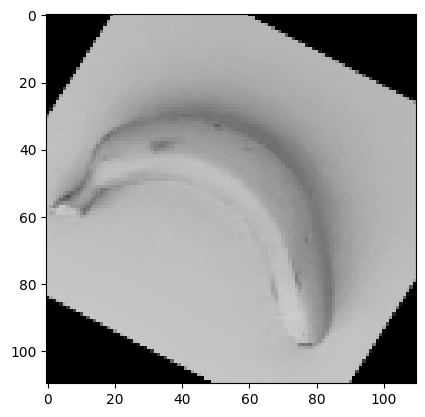

In [24]:
import matplotlib.pyplot as plt
test_fruit_images = []
test_labels = []
for fruit_dir_path in glob.glob("dataset/dataset/test/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.png")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (110, 110))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        test_fruit_images.append(image)
        test_labels.append(fruit_label)
test_fruit_images = np.array(test_fruit_images)
plt.imshow(cv2.cvtColor(test_fruit_images[1], cv2.COLOR_GRAY2RGB))
plt.show()
#cv2.imshow(test_fruit_images[1])
test_fruit_images = test_fruit_images.reshape(len(test_fruit_images),-1)
test_labels = np.array(test_labels)

Display the shape (dimensions) of the 'test_fruit_images' array and the 'test_labels' array.

In [25]:
print(np.shape(test_fruit_images))
print(np.shape(test_labels))

(2698, 12100)
(2698,)


Define a function `plot_items` to display images in a grid. 

It reshapes the images into rows, fills empty spaces with black, and presents them in grayscale without axis labels.

In [26]:
def plot_items(instances, images_per_row=10, **options):
    size = 110
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

# Data visualization

Plot items from each of all the categories.

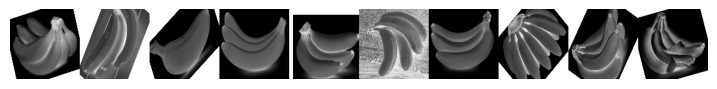

In [27]:
plt.figure(figsize=(9,9))
X_0 = fruit_images[(labels == "freshbanana")]
example_images = X_0[:10]
plot_items(example_images, images_per_row=10)

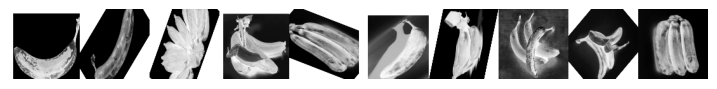

In [28]:
plt.figure(figsize=(9,9))
X_0 = fruit_images[(labels == "rottenbanana")]
example_images = X_0[:10]
plot_items(example_images, images_per_row=10)

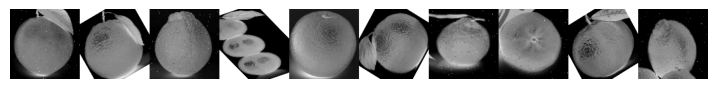

In [29]:
plt.figure(figsize=(9,9))
X_0 = fruit_images[(labels == "freshoranges")]
example_images = X_0[:10]
plot_items(example_images, images_per_row=10)

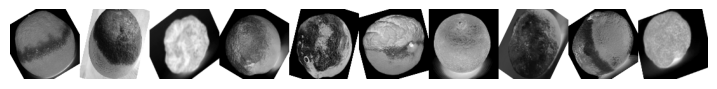

In [30]:
plt.figure(figsize=(9,9))
X_0 = fruit_images[(labels == "rottenoranges")]
example_images = X_0[:10]
plot_items(example_images, images_per_row=10)

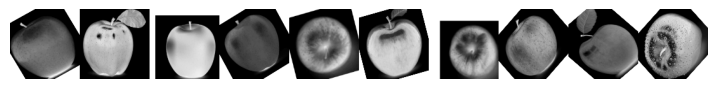

In [31]:
plt.figure(figsize=(9,9))
X_0 = fruit_images[(labels == "freshapples")]
example_images = X_0[:10]
plot_items(example_images, images_per_row=10)

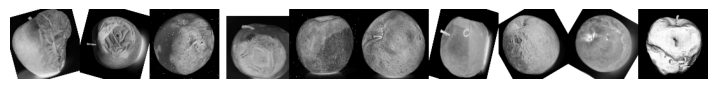

In [32]:
plt.figure(figsize=(9,9))
X_0 = fruit_images[(labels == "rottenapples")]
example_images = X_0[:10]
plot_items(example_images, images_per_row=10)

# Try different classifiers: Random forest, MLP and SVM

1. Random forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(fruit_images, labels)

RandomForestClassifier(random_state=42)

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score

accuracy_scores = cross_val_score(forest_clf, fruit_images, labels, cv=3, scoring='accuracy')

In [35]:
print("accuracy_scores:", accuracy_scores)

accuracy_scores: [0.84810127 0.83048982 0.83126892]


In [37]:
average_setting = None

precision_scorer = make_scorer(precision_score, average = average_setting)
recall_scorer = make_scorer(recall_score, average = average_setting)

precision_scores = []
precision_scores = cross_val_score(forest_clf, fruit_images, labels, cv=3, scoring=precision_scorer)

ValueError: scoring must return a number, got [0.84398496 0.92380952 0.83606557 0.75940707 0.936      0.80519481] (<class 'numpy.ndarray'>) instead. (scorer=score)

In [ ]:
recall_scores = []
recall_scores = cross_val_score(forest_clf, fruit_images, labels, cv=3, scoring=recall_scorer)

In [ ]:
print("precision_scores:", precision_scores)
print("recall_scores:", recall_scores)

accuracy_scores: [0.83296643 0.83681893 0.83649876]
precision_scores: [nan nan nan]
recall_scores: [nan nan nan]


2. MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
MLP_clf = MLPClassifier(random_state=42)
MLP_clf.fit(fruit_images, labels)

MLPClassifier(random_state=42)

In [ ]:
accuracy_scores = cross_val_score(MLP_clf, fruit_images, labels, cv=3, scoring='accuracy')
precision_scores = cross_val_score(MLP_clf, fruit_images, labels, cv=3, scoring='precision')
recall_scores = cross_val_score(MLP_clf, fruit_images, labels, cv=3, scoring='recall')

In [ ]:
print("accuracy_scores:", accuracy_scores)
print("precision_scores:", precision_scores)
print("recall_scores:", recall_scores)

3. SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42, probability=True))
ovr_clf.fit(fruit_images, labels)

In [ ]:
accuracy_scores = cross_val_score(ovr_clf, fruit_images, labels, cv=3, scoring='accuracy')
precision_scores = cross_val_score(ovr_clf, fruit_images, labels, cv=3, scoring='precision')
recall_scores = cross_val_score(ovr_clf, fruit_images, labels, cv=3, scoring='recall')

In [ ]:
print("accuracy_scores:", accuracy_scores)
print("precision_scores:", precision_scores)
print("recall_scores:", recall_scores)

# Train the classifier using the training data and use the test images to check the recall and precision

1. random forest

In [ ]:
y_predict_forest = forest_clf.predict(test_fruit_images)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_predict_forest = forest_clf.predict(test_fruit_images)

accuracy = accuracy_score(y_predict_forest, test_labels)
precision = precision_score(y_predict_forest, test_labels, average=None)
recall = recall_score(y_predict_forest, test_labels, average=None)

print("accuracy: ", accuracy)
print("recall: ", recall)
print("precision: ", precision)

accuracy:  0.8654558932542624
recall:  [0.85750636 0.92447917 0.87912088 0.7886057  0.92523364 0.85070423]
precision:  [0.85316456 0.93175853 0.82474227 0.87520799 0.93396226 0.74937965]


2. MLP

In [ ]:
y_predict_forest = MLP_clf.predict(test_fruit_images)
accuracy = accuracy_score(y_predict_forest, test_labels)
precision = precision_score(y_predict_forest, test_labels, average=None)
recall = recall_score(y_predict_forest, test_labels, average=None)

print("accuracy: ", accuracy)
print("recall: ", recall)
print("precision: ", precision)

accuracy:  0.22424017790956263
recall:  [0.         0.         0.         0.22350316 0.         0.5       ]
precision:  [0.         0.         0.         1.         0.         0.00992556]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3. SVM

In [ ]:
y_predict_forest = ovr_clf.predict(test_fruit_images)
accuracy = accuracy_scores(y_predict_forest, test_labels)
precision = precision_score(y_predict_forest, test_labels, average=None)
recall = recall_score(y_predict_forest, test_labels, average=None)

print("accuracy: ", accuracy)
print("recall: ", recall)
print("precision: ", precision)